In [2]:
import pandas as pd
import numpy as np
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
overall_eCPM = pd.read_csv('overall_eCPM.csv')

In [6]:
series = overall_eCPM['Ad eCPM ($)']

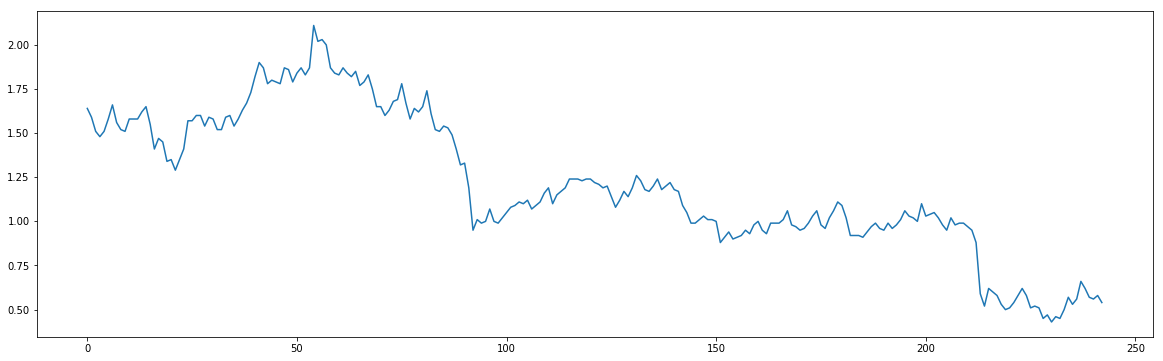

In [7]:
pyplot.figure(figsize=(20,6))
pyplot.plot(series.values)
pyplot.show()

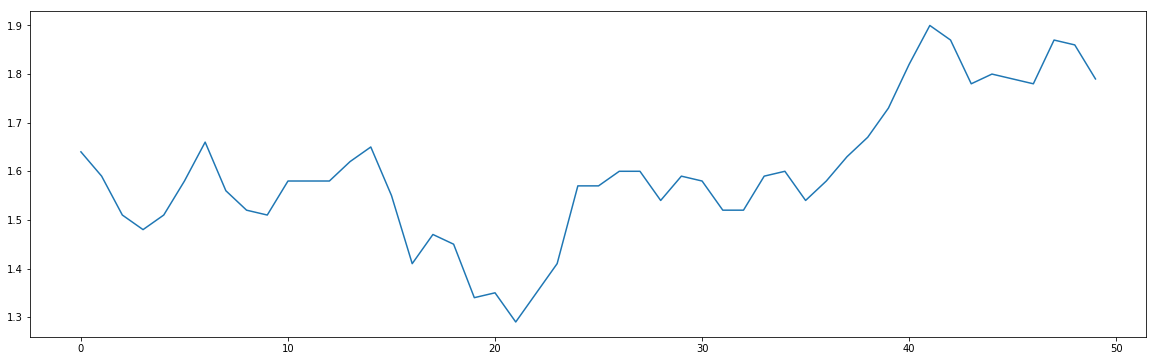

In [8]:
pyplot.figure(figsize=(20,6))
pyplot.plot(series.values[:50])
pyplot.show()

In [12]:
# normalize features - 

scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(overall_eCPM['Ad eCPM ($)'].values.reshape(-1,1))
series = pd.DataFrame(scaled)

In [13]:
window_size = 50

series_s = series.copy()
for i in range(window_size):
    series = pd.concat([series, series_s.shift(-(i+1))], axis = 1)
    
series.dropna(axis=0, inplace=True)

In [14]:
series.head()

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0.440476,0.380952,0.285714,0.250000,0.285714,0.369048,0.464286,0.345238,0.297619,0.285714,...,0.750000,0.714286,0.607143,0.630952,0.619048,0.607143,0.714286,0.702381,0.619048,0.678571
1,0.380952,0.285714,0.250000,0.285714,0.369048,0.464286,0.345238,0.297619,0.285714,0.369048,...,0.714286,0.607143,0.630952,0.619048,0.607143,0.714286,0.702381,0.619048,0.678571,0.714286
2,0.285714,0.250000,0.285714,0.369048,0.464286,0.345238,0.297619,0.285714,0.369048,0.369048,...,0.607143,0.630952,0.619048,0.607143,0.714286,0.702381,0.619048,0.678571,0.714286,0.666667
3,0.250000,0.285714,0.369048,0.464286,0.345238,0.297619,0.285714,0.369048,0.369048,0.369048,...,0.630952,0.619048,0.607143,0.714286,0.702381,0.619048,0.678571,0.714286,0.666667,0.714286
4,0.285714,0.369048,0.464286,0.345238,0.297619,0.285714,0.369048,0.369048,0.369048,0.416667,...,0.619048,0.607143,0.714286,0.702381,0.619048,0.678571,0.714286,0.666667,0.714286,1.000000


In [48]:
nrow = round(0.9*series.shape[0])

In [49]:
train = series.iloc[:nrow, :]
test = series.iloc[nrow:,:]

In [50]:
from sklearn.utils import shuffle
train = shuffle(train)

In [51]:
train_X = train.iloc[:,:-1]
train_y = train.iloc[:,-1]
test_X = test.iloc[:,:-1]
test_y = test.iloc[:,-1]
train_X = train_X.values
train_y = train_y.values
test_X = test_X.values
test_y = test_y.values
train_X.shape
train_y.shape
test_X.shape
test_y.shape

(19,)

In [52]:
train_X = train_X.reshape(train_X.shape[0],train_X.shape[1],1)
test_X = test_X.reshape(test_X.shape[0],test_X.shape[1],1)

In [53]:
train_X.shape
train_y.shape
test_X.shape
test_y.shape

(19,)

In [54]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(input_shape = (50,1), output_dim= 50, return_sequences = True))
model.add(Dropout(0.5))
model.add(LSTM(256))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam")
model.summary()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(input_shape=(50, 1), return_sequences=True, units=50)`
  This is separate from the ipykernel package so we can avoid doing imports until


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               314368    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 325,025
Trainable params: 325,025
Non-trainable params: 0
_________________________________________________________________


In [201]:
start = time.time()
model.fit(train_X,train_y,batch_size=512, nb_epoch=20, validation_split=0.1)
print("> Compilation Time : ", time.time() - start)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 156 samples, validate on 18 samples
Epoch 1/20
156/156 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.0047
Epoch 2/20
156/156 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.0051
Epoch 3/20
156/156 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0055
Epoch 4/20
156/156 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0066
Epoch 5/20
156/156 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.0066
Epoch 6/20
156/156 [==============================] - 0s 2ms/step - loss: 0.0102 - val_loss: 0.0057
Epoch 7/20
156/156 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.0049
Epoch 8/20
156/156 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0044
Epoch 9/20
156/156 [==============================] - 0s 2ms/step - loss: 0.0087 - val_loss: 0.0044
Epoch 10/20
156/156 [==============================] - 

In [202]:
# Doing a prediction on all the test data at once
preds = model.predict(test_X)

In [203]:
preds = scaler.inverse_transform(preds)

In [210]:
preds

array([[0.6118062 ],
       [0.6141875 ],
       [0.571613  ],
       [0.5487314 ],
       [0.53654593],
       [0.50049764],
       [0.4897558 ],
       [0.46702516],
       [0.46977782],
       [0.46922976],
       [0.4935026 ],
       [0.54406804],
       [0.54948974],
       [0.5567723 ],
       [0.6091025 ],
       [0.61914515],
       [0.58732873],
       [0.5551908 ],
       [0.5461635 ]], dtype=float32)

In [204]:
actuals = scaler.inverse_transform(test_y.reshape(-1,1))
#actuals = test_y

In [205]:
mean_squared_error(actuals,preds)

0.002639979451910873

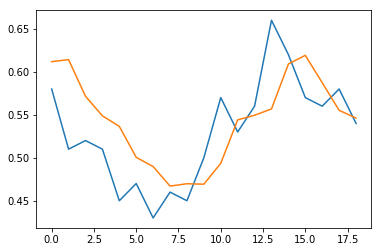

In [206]:
pyplot.plot(actuals)
pyplot.plot(preds)
pyplot.show()

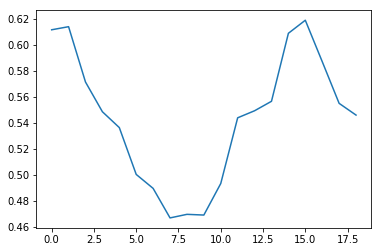

In [207]:
pyplot.plot(preds)
pyplot.show()